In [26]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load Cleaned Data

In [27]:
all_data = []
file_map = {
    "data/benin_clean.csv": "Benin",
    "data/togo_clean.csv": "Togo",
   "data/sieraleone_clean.csv": "SieraLeone"
}
for file_path, country in file_map.items():
    try:
        df = pd.read_csv(file_path,parse_dates=['Timestamp'])
        df['Country'] = country
        all_data.append(df)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Skipping.")

combined_df = pd.concat(all_data, ignore_index=True)

# Metric Comparision

## Boxplots

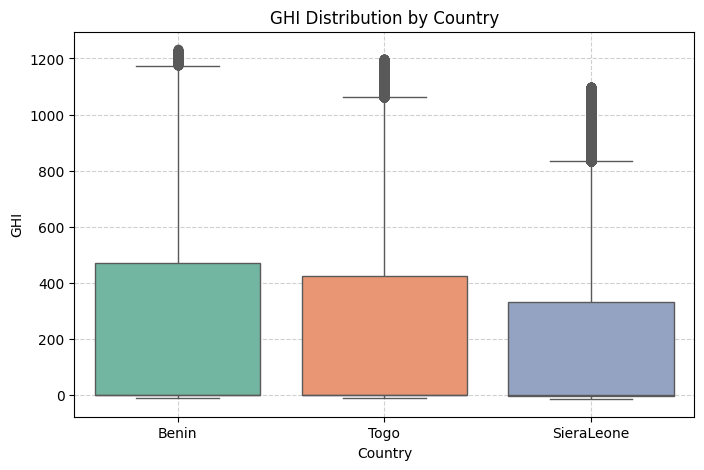

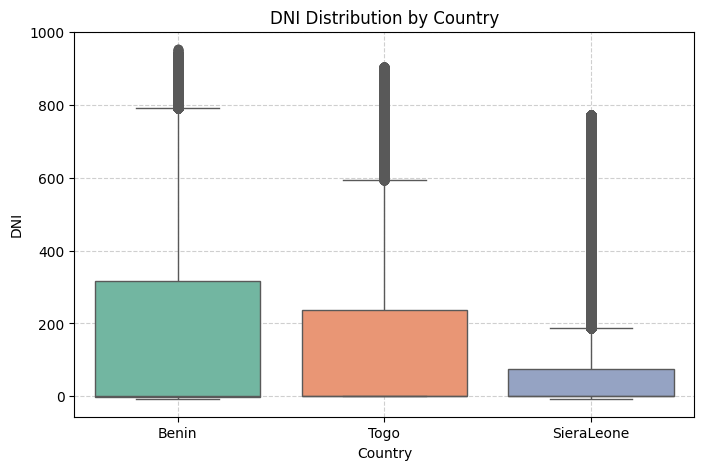

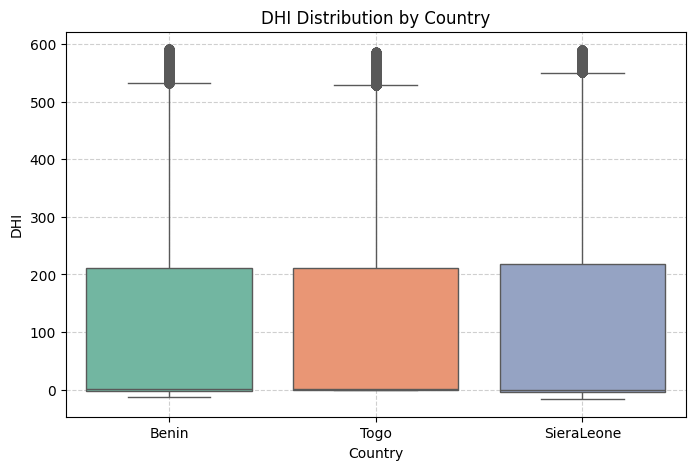

In [28]:
metrics = ["GHI", "DNI", "DHI"]
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Country", y=metric, data=combined_df, palette="Set2", hue="Country", legend=False)
    plt.title(f"{metric} Distribution by Country")
    plt.xlabel("Country")
    plt.ylabel(metric)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

## Summary Table

In [29]:
summary_table = (
    combined_df.groupby("Country")[metrics]
    .agg(["mean", "median", "std"])
    .round(2)
).T
summary_table.columns.name = None
summary_table.index.names = ['Metric', 'Statistic']

print("\nSummary Table (Mean, Median, Std):")
print(summary_table)


Summary Table (Mean, Median, Std):
                   Benin  SieraLeone    Togo
Metric Statistic                            
GHI    mean       236.23      185.00  223.86
       median       0.70       -0.40    0.50
       std        328.29      279.02  317.31
DNI    mean       166.90      104.13  147.98
       median      -0.10       -0.10    0.00
       std        262.08      200.95  247.68
DHI    mean       111.66      108.10  112.78
       median       0.50       -0.60    1.50
       std        153.10      153.69  151.57


# Statistical Testing

In [33]:
groups = [combined_df.loc[combined_df["Country"] == c, "GHI"].dropna() for c in combined_df["Country"].unique()]

# One-way ANOVA
f_stat, p_val = stats.f_oneway(*groups)
print(f"\nOne-way ANOVA for GHI:")
print(f"F-statistic = {f_stat:.3f}, p-value = {p_val:.5f}")

# Robustness check: Kruskal–Wallis test
h_stat, p_val_kw = stats.kruskal(*groups)
print(f"Kruskal–Wallis H = {h_stat:.3f}, p-value = {p_val_kw:.5f}")


One-way ANOVA for GHI:
F-statistic = 3833.184, p-value = 0.00000
Kruskal–Wallis H = 6548.534, p-value = 0.00000


# Visual Summary

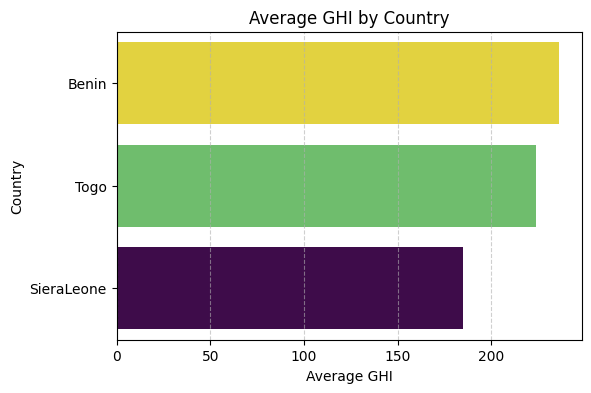

In [31]:
avg_ghi = combined_df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette="viridis", hue=avg_ghi.values, legend=False)
plt.title("Average GHI by Country")
plt.xlabel("Average GHI")
plt.ylabel("Country")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()


# Observations

- **Benin** records the highest mean GHI (236.23 W/m²) and also the largest variability (std = 328.29 W/m²).
This suggests strong but inconsistent solar irradiance, meaning Benin experiences both very sunny and cloudy conditions throughout the year.

- **Togo** follows with a moderately high mean GHI (223.86 W/m²) but slightly lower variability, indicating more stable solar conditions compared to Benin. Its DNI (147.98 W/m²) also supports relatively strong direct sunlight potential.

- **Siera Leone** consistently shows the lowest averages across all three metrics (GHI = 185.00, DNI = 104.13, DHI = 108.10 W/m²),
suggesting weaker solar irradiance overall. However, its similar DHI values indicate a higher share of diffuse light, possibly due to persistent cloud cover or humidity.